In [70]:
using MAT
using PyPlot

In [52]:
include("megamap.jl")

simulate (generic function with 1 method)

In [3]:
predictedW = matread("../clusterResults/fittedW_1m_grid.mat")

Dict{String,Any} with 2 entries:
  "fittedW"          => [0.0 0.0 … 0.0 0.000113493; 0.0 0.0 … 0.0 0.0; … ; 0.0 …
  "evaluationPoints" => [50, 150, 250, 350, 450, 550, 650, 750, 850, 950  …  30…

In [4]:
function convToJulia(arr)
    if length(arr) == 0
        return Vector{Float64}()
    elseif length(arr) == 1
        return [arr]
    else
        return Vector{Float64}(arr[:,1])
    end
end

convToJulia (generic function with 1 method)

In [6]:
vars = matread("../place_field_data.mat")

Dict{String,Any} with 6 entries:
  "PF_meanCaV"       => Any[[1.04255; 0.840925; … ; 0.216259; 0.941846]; Array{…
  "PFactive_centers" => Any[[700.0; 1064.0; … ; 3254.5; 3947.5]; [16.0; 922.5; …
  "PF_width"         => Any[[57.0; 111.0; … ; 64.0; 112.0]; Array{Any}(0,0); … …
  "PFactive_meanCaV" => Any[[1.04255; 0.840925; … ; 0.216259; 0.941846]; [0.032…
  "PF_centers"       => Any[[700.0; 1064.0; … ; 3254.5; 3947.5]; Array{Any}(0,0…
  "PFactive_width"   => Any[[57.0; 111.0; … ; 64.0; 112.0]; [31.0; 114.0; … ; 6…

In [7]:
placeCenters = convToJulia.(vars["PF_centers"])[:,1];

In [9]:
targetMap = TargetMap(placeCenters; placeWidth=50.0)

TargetMap(50.0, 0.2, 15.0, 721.4172729890633, 0.3, 0.0024950885810399595, Array{Float64,1}[[700.0, 1064.0, 1177.5, 2131.0, 2603.5, 3254.5, 3947.5], Float64[], Float64[], Float64[], [16.0, 922.5, 1776.0, 2156.0, 2311.5, 2780.0], [144.0, 2936.5], Float64[], [228.5], [470.0, 778.5, 855.0, 1905.0, 2563.5, 2720.5, 3259.0], [2811.0, 3904.5]  …  [85.5, 2352.5, 2602.0, 4091.0], [16.0, 3849.0, 3942.0], Float64[], [140.5], [1993.0, 2185.0, 3544.5], Float64[], [2444.0, 2664.0, 2858.0, 3500.0], Float64[], Float64[], [255.0, 517.5, 786.5, 1128.5, 1577.0, 1641.5, 1847.5, 2556.0, 2958.5, 3457.0, 3727.5]])

In [42]:
W = predictedW["fittedW"]
forwardMap = ForwardMap(targetMap.fPeak, targetMap.inhibThres, targetMap.wI, W)

ForwardMap(15.0, 721.4172729890633, 0.0024950885810399595, [0.0 0.0 … 0.0 0.000113493; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 2.43118e-5 0.0 … 0.0 0.0])

In [81]:
target = fTarget(60, targetMap);
inp = input(60, targetMap);
fPerStep = simulate(forwardMap, inp; timesteps=1000)
convergance = [sum((fPerStep[t,:] .- target).^2) for t=1:1000];

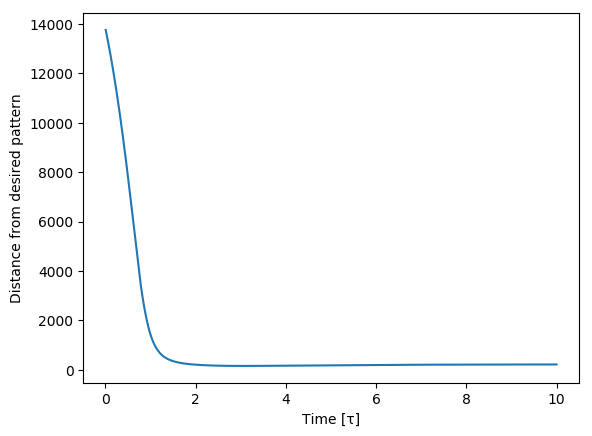

PyObject Text(24,0.5,u'Distance from desired pattern')

In [82]:
plot((1:1000)*0.01, convergance)
xlabel("Time [τ]")
ylabel("Distance from desired pattern")

In [105]:
endConvergence = Vector{Float64}()
for x=0:10:4000
    target = fTarget(x, targetMap);
    inp = input(x, targetMap);
    fPerStep = simulate(forwardMap, inp; timesteps=700)
    convergance = [sum((fPerStep[t,:] .- target).^2) for t=1:700];
    push!(endConvergence, convergance[end])
end

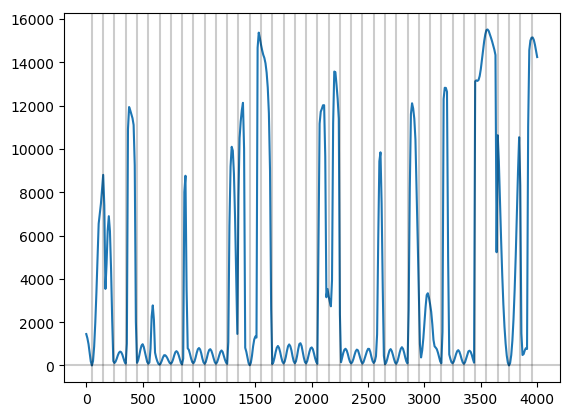

PyObject <matplotlib.lines.Line2D object at 0x7f05fd646e50>

In [106]:
plot(0:10:4000, endConvergence)
for i=50:100:3950
    axvline(i, c="k", alpha=.2)
end
axhline(0, c="k", alpha=.2)

In [100]:
target = fTarget(90, targetMap);
closestAttractor = fTarget(50, targetMap);
inp = input(90, targetMap);

In [103]:
fPerStep = simulate(forwardMap, inp; timesteps=700)
convergance = [sum((fPerStep[t,:] .- closestAttractor).^2) for t=1:700];

In [101]:
fPerStep = simulate(forwardMap, inp; timesteps=700)
convergance = [sum((fPerStep[t,:] .- target).^2) for t=1:700];

In [104]:
convergance

700-element Array{Float64,1}:
 16694.6  
 16628.3  
 16561.1  
 16493.1  
 16424.2  
 16354.4  
 16283.8  
 16212.3  
 16139.8  
 16066.5  
 15992.2  
 15916.9  
 15840.8  
     ⋮    
   951.469
   951.352
   951.235
   951.118
   951.003
   950.888
   950.773
   950.659
   950.546
   950.434
   950.322
   950.21 